In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
da = pd.read_csv('Iris.csv')

In [3]:
da

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encod = LabelEncoder().fit_transform(da['Species'])

In [4]:
x = da.drop(columns=['Id','Species'])

In [5]:
y = da['Species']

In [6]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 40)

In [9]:
dt = DecisionTreeClassifier()

In [10]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [11]:
dt.predict(x_test)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [12]:
from sklearn import metrics

In [13]:
print(metrics.accuracy_score(y_test,dt.predict(x_test)))

1.0


In [14]:
from sklearn import tree

[Text(0.4, 0.9166666666666666, 'PetalWidthCm <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [34, 36, 35]\nclass = Iris-versicolor'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.75, 'PetalLengthCm <= 4.95\ngini = 0.5\nsamples = 71\nvalue = [0, 36, 35]\nclass = Iris-versicolor'),
 Text(0.2, 0.5833333333333334, 'PetalWidthCm <= 1.65\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]\nclass = Iris-versicolor'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = Iris-versicolor'),
 Text(0.3, 0.4166666666666667, 'SepalWidthCm <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.8, 0.5833333333333334, 'PetalWidthCm <= 1.75\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]\nclass = Iris-virginica'),
 Te

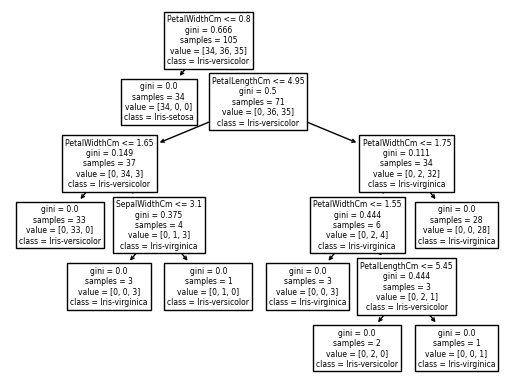

In [15]:
tree.plot_tree(dt, feature_names = da.columns[1:-1], class_names = da['Species'].unique())

In [16]:
da.columns[1:-1]

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [17]:
da['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

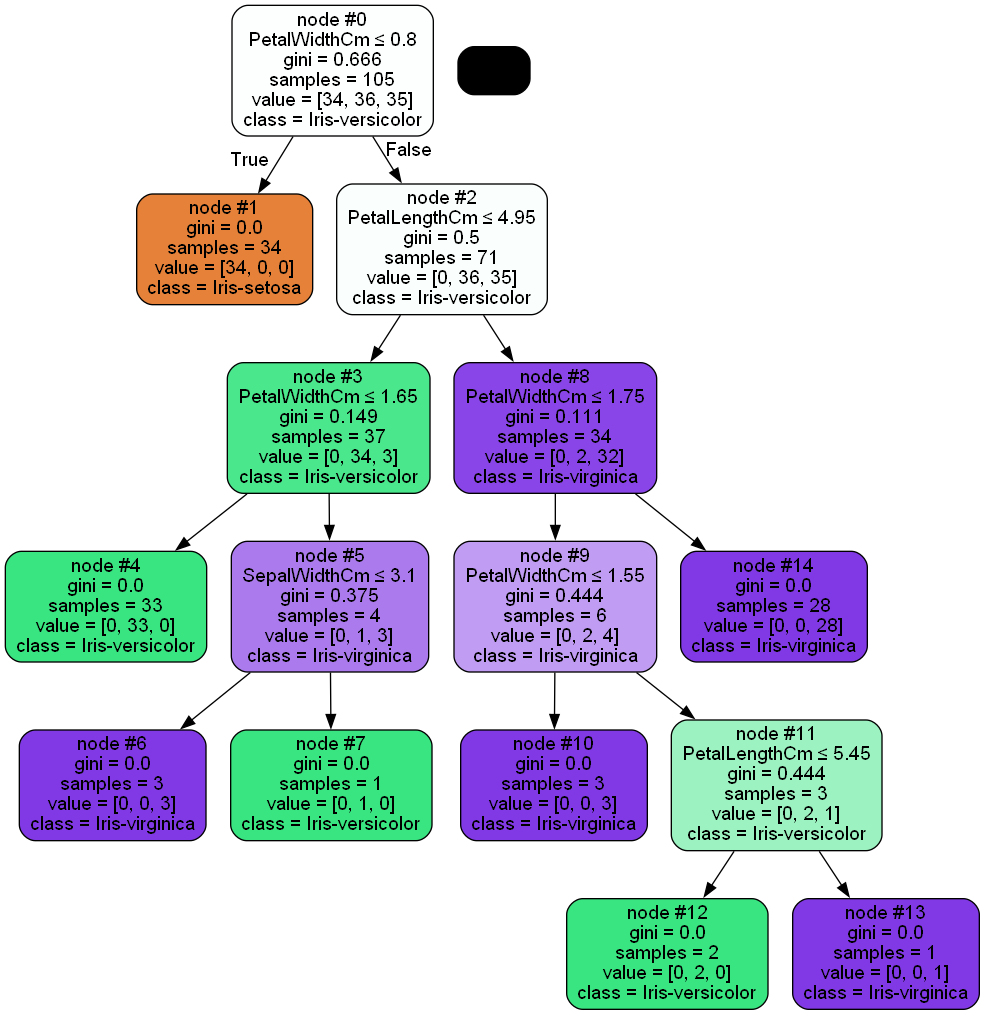

In [19]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, 
                feature_names = da.columns[1:-1], 
                class_names = da['Species'].unique(),
                filled = True, rounded = True, 
                special_characters = True, node_ids = True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

# Generate .png image of "Decision Tree"
Image(graph.create_png())

In [20]:
da['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
da.columns[1:-1]

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')